# Wrangle act

---

## We rate dogs (arquivos Tweeter)

Possíveis ferramentas que terei que lidar:

- pandas OK

- NumPy OK

- requests (tenho pouca experiência)

- tweepy (pouca experiência)

- json (pouca experiência)

---

- You need to be able to create written documents that contain images and you need to be able to export these documents as PDF file (OK tratamos isso na aula)

- This task can be done in a Jupyter Notebook, but you might prefer to use a word processor like Google Docs, which is free, or Microsoft Word (OK tratamos isso na aula)

- A text editor, like Sublime, which is free, will be useful but is not required (OK, tenho Notepad++)

### Colinha - Data Wrangling

- Gather

- Assess

- Clean

E...
- Analyse + Visualize + Model

*lembrar que todo o processo é iterativo e que cada detalhe do processo também pode ser iterativo!*

---

#### Missão

- 8 problemas de qualidade e 2 de organização

- Data Visualisation, com interpretaçãp dos dados

- Wrangle Report e Act Report

---

Minha biblioteca de ferramentas (posso precisar delas durante o projeto)

*Estratégia: deixo todas as bibliotecas que aprendemos no módulo aqui. Se precisar de alguma delas, eu aciono a máquina virtual*

In [ ]:
import zipfile
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup
import os
import filecmp
import glob
import wptools
import rtsimple as rt

Tutorial do json [aqui](https://realpython.com/python-json/)

In [ ]:
import json

Tutorial do tweepy [aqui](https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/)

In [1]:
import tweepy

# Primeira Iteração


## Gather

---

### Primeiro objetivo

- recuperar o conteúdo do arquivo: tweet-json.txt

- recuperar as imagens no endereço web: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- recuperar o conteúdo do arquivo: twitter_archive_enhanced.csv

- baixar atualizações das mensagens através do servidor Tweeter

--- 

*Obs: tudo isso é um processo **iterativo**. Então depois de Gather1, Assess1 e Clean1, virá Gather2, Assess2 e Clean2 e assim por diante, até termos dados com qualidade melhor*

Então usarei uma sigla para denominar a etapa:

- Gather1 - farei minha primeira aquisição de dados, o arquivo mais óbvio .csv

- Assess1 - farei minha primeira inspeção no arquivo, verificando o formato e a qualidade dos dados e documentando em texto

- Clean1 - pularei esta etapa. O motivo é que eu tenho um segundo arquivo com mais dados a serem apensados. Seria absurdo começar a materializar a limpeza antes de me certificar de que estou em posse de tudo o que preciso

*Obs2: pelo que eu entendi, a ideia básica não é fazer uma **limpeza completa** nos dados. Isso poderia custar algumas semanas, talvez **meses**. Mas simplesmente documentar algumas inconsistências e repará-las usando os comandos Pandas adequados. Pelo que entendi, o objetivo deste projeto não é ter um banco perfeito, mas demonstrar aptidão nas ferramentas demonstradas neste módulo*

In [15]:
import pandas as pd

In [1]:
import os

Eu dei um upload no arquivo inicial, preciso conferir se ele está mesmo no diretório, pois da primeira vez não entrou...

Encontrei este código para listar diretórios, no StackOverflow. Ele me é útil para localizar meus arquivo e eu não me perder no projeto:

In [2]:
for dirname, dirnames, filenames in os.walk('.'):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        print(os.path.join(dirname, filename))

./.ipynb_checkpoints
./twitter-archive-enchancedNEW
./twitter-archive-enhancedNEW.csv
./wrangle_act.ipynb
./Untitled1.ipynb
./image-predictions-3.tsv
./tweet-json.txt
./twitter-archive-enhanced.csv
./wrangle_report.ipynb
./Untitled.ipynb
./act_report.ipynb
./image_predictions.tsv
./tweet_json.txt
./twitter-archive-enchancedNEW.csv
./.ipynb_checkpoints/wrangle_act-checkpoint.ipynb
./.ipynb_checkpoints/act_report-checkpoint.ipynb
./.ipynb_checkpoints/Untitled1-checkpoint.ipynb
./.ipynb_checkpoints/wrangle_report-checkpoint.ipynb
./.ipynb_checkpoints/Untitled-checkpoint.ipynb


primeira fonte, o **.csv**:

In [18]:
dfinicial = pd.read_csv('twitter-archive-enhanced.csv')

In [19]:
dfinicial.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Preciso descobrir o que significa:

- **doggo** - um pupper grande, normalmente mais velho

- **floofer** - esse então é um doggo bem grande, ainda mais velho

- **pupper** - um novinho, filhotinho

- **puppo** - um teenager, entre pupper e doggo

*resumo: pupper $\rightarrow$ puppo $\rightarrow$ doggo $\rightarrow$ floofer*

Eu quero saber os nomes dos meus campos no DF principal:

In [7]:
list(dfinicial.columns.values)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

E uma prévia de tipos e se eles estão preenchidos:

In [9]:
dfinicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Eu observei muitos campos em branco. Alguns são listados explicitamente aqui, como **retweeted_status_id**, outros estão completos com valores inválidos, como **floofer**

Agora eu quero investigar o campo **text**. Aparentemente toda a informação que eu busco e está faltando se encontra nele!

In [19]:
contador = 0
a = dfinicial['text']
for mensagem in a:
    if contador <= 10:
        print(mensagem)
    else:
       break
    contador += 1

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

Segunda fonte, a **URL**:

In [1]:
import requests as rq

In [5]:
import os

In [2]:
import pandas as pd

Trouxe meu conteúdo:

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resposta = rq.get(url)

resposta.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [13]:
arquivo = 'image_predictions.tsv'

with open(os.path.join(arquivo), mode='wb') as file:
    file.write(resposta.content)

Parece que deu certo:

In [14]:
imagens = pd.read_csv(arquivo, sep = '\t')

imagens.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Terceira fonte, o **Twitter**:

In [22]:
import tweepy

In [23]:
import json

Chaves mágicas:

In [60]:
consumer_key = 'q8qczkzqq3rTcoZOx8a3d0Ts5'
consumer_secret = 'Ik5K7W0jRuR7GG5tuYeTFuAYRif6JHtmt0eTyglNgdjooHgTyZ'
access_token = '1098627688816873474-vVAWrDN0dcZXPXLCBLxdiP35UpSClX'
access_secret = 'ERKtqlfYdq3UmdlPKfuyxVAmk0P53rOOYMkui2JK85z1E'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True,
                 parser=tweepy.parsers.JSONParser())

Eu quero vocês:

In [61]:
IDs = list(dfinicial['tweet_id'])
IDs

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

Primeiro teste (isolado):

*Erro 205 é erro de autenticação! (criada conta app Twitter - problema superado)*

In [62]:
tweet_id = IDs[0]

captura = []
entrou = []
nentrou = []

try: 
    dados = api.get_status(tweet_id, tweet_mode='extended')
    capturados.append(dados)
    entrou.append(tweet_id)
except Exception as erro:
    print('não entrou :{}, erro :{}'.format(tweet_id, erro.args[0][0]['code']))
    nentrou.append(tweet_id)

Segundo teste (loop):

In [63]:
captura = []
entrou = []
nentrou = []

for tweet_id in IDs:
    try: 
        dados = api.get_status(tweet_id, tweet_mode='extended')
        capturados.append(dados)
        print('entrou :{}'.format(tweet_id))
        entrou.append(tweet_id)
    except Exception as erro:
        print('não entrou :{}, erro :{}'.format(tweet_id, erro.args[0][0]['code']))
        nentrou.append(tweet_id)

entrou :892420643555336193
entrou :892177421306343426
entrou :891815181378084864
entrou :891689557279858688
entrou :891327558926688256
entrou :891087950875897856
entrou :890971913173991426
entrou :890729181411237888
entrou :890609185150312448
entrou :890240255349198849
entrou :890006608113172480
entrou :889880896479866881
entrou :889665388333682689
entrou :889638837579907072
entrou :889531135344209921
entrou :889278841981685760
entrou :888917238123831296
entrou :888804989199671297
entrou :888554962724278272
não entrou :888202515573088257, erro :144
entrou :888078434458587136
entrou :887705289381826560
entrou :887517139158093824
entrou :887473957103951883
entrou :887343217045368832
entrou :887101392804085760
entrou :886983233522544640
entrou :886736880519319552
entrou :886680336477933568
entrou :886366144734445568
entrou :886267009285017600
entrou :886258384151887873
entrou :886054160059072513
entrou :885984800019947520
entrou :885528943205470208
entrou :885518971528720385
entrou :88531

In [64]:
with open('tweet_json.txt', mode ='w') as arquivo:
    json.dump(captura, arquivo) #jogo item a item de conteído da lista

Último registro de ID processado (para comparar com o último ID da lista):

In [65]:
a = 666020888022790149
len(IDs)

2356

Parece tudo terminado na captura do Twitter, não? Pois é, fui dormir e de madrugada me vieram as dúvidas... é que tecnicamente esta busca está **errada**. Explico:

- eu consumo um serviço externo, que demanda um esforço de servidores enorme. Este serviço deveria ser **poupado ao máximo**!

- ao cair ávido por dados no meu **Gathering** eu esqueci que o melhor seria fazer essas fases **iterativamente**, ou seja:

 - puxar o arquivo principal, limpar
 
 - selecionar os IDs **realmente necessários** e
 
 - só **depois** consumir o serviço do servidor **Twitter**
 
Bom, seguindo princípio **DRY** (Don´t Repeat Yourself), aprendido a duras penas num certo curso da Udacity envolvendo cartas e um jogo de Pôquer, resolvi transformar essas etapas aí de cima numa função. Assim o processo **iterativo** poderia ocorrer com mais facilidade:

*tem mais um motivo de querer formatar uma função bonitinha. A gente acaba lidando com tanto código de terceiros que não sabe se realmente está aprendendo a programar, ou se está fazendo trabalho de bricolagem (esses recorte e cola)! Então é bom exercitar programação elegante*

---
    """"
    Esta função traz informações através do serviço Twitter.
    Alguns dados estão setados por default para a minha conta de app.
    Entrada: basicamente a lista de IDs que eu quero buscar.
    Saída:   um arquivo gravado no meu diretório.
         por padrão, será o arquivo no nome indicado para este curso.
    ATENÇÃO - SERVIÇO LENTO E DEMORADO E... CUIDADO COM O QUE VOCÊ VAI BUSCAR!
         VOCÊ CONCORDOU COM UM COMPROMISSO DE PRIVACIDADE ESTRITO E SE
         NÃO CUMPRIR, ISSO PODE LHE INCORRER UM PROCESSO JUDICIAL!
    """"

In [4]:
def VeTwitter(ListaIDs, #único parâmetro obrigatório, lista de IDs
              nomarquivo = 'tweet_json.txt',
              consumer_key = 'q8qczkzqq3rTcoZOx8a3d0Ts5', 
              consumer_secret = 'Ik5K7W0jRuR7GG5tuYeTFuAYRif6JHtmt0eTyglNgdjooHgTyZ',
              access_token = '1098627688816873474-vVAWrDN0dcZXPXLCBLxdiP35UpSClX',
              access_secret = 'ERKtqlfYdq3UmdlPKfuyxVAmk0P53rOOYMkui2JK85z1E'):
    import tweepy
    import json    
    from time import time #gosto de deixar as importações logo no início
    
    tempo0 = time() #iniciei meu contador aqui
    ### etapa Twitter ###
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit = True,
                     wait_on_rate_limit_notify = True,
                     parser=tweepy.parsers.JSONParser())
    
    entrou = [] #lista dos que entraram
    nentrou = [] #lista dos que não entraram
    captura = [] #lista do conteúdo individual capturado

    for tweet_id in ListaIDs:
        try: 
            dados = api.get_status(tweet_id, tweet_mode='extended')
            captura.append(dados)
            print('entrou :{}'.format(tweet_id))
            entrou.append(tweet_id)
        except Exception as erro:
            print('não entrou :{}, erro :{}'.format(tweet_id, 
                   erro.args[0][0]['code'])) #StackOverflow:apenas código!
            nentrou.append(tweet_id)

    ### etapa gravação ###                
    with open(nomarquivo, mode ='w') as arquivo:
        json.dump(captura, arquivo)
        
    print('Operação concluída, levou :{} segundos'.format(tempo0))
    return True

Esta chamada ficou propositalmente em branco, vou usá-la mais tarde!

In [ ]:
VeTwitter(IDs)

In [4]:
import pandas as pd
import json

In [5]:
dfnovo = pd.read_json('tweet_json.txt')
dfnovo.head(5)

""


## Assess

---

O objetivo fundamental deste **primeiro** Assess é observar se no arquivo original dos cães, podemos **eliminar** registros inúteis. Identificamos que isso irá nos facilitar enormemente no arquivo que depende da sincronização dos serviço Twitter. Então será um Assess focado. Na **segunda** iteração buscaremos por outros erros. Busco:

- registros duplicados (se houver)

- registros sem foto (para que vai me servir um registro sem a foto do cão?)

- respotwitter - segundo documentação Twitter[aqui](https://support.birdiq.net/knowledge-base/twitter-tweet-columns/) $\rightarrow$ (9	**InReplyToStatusId**	If the represented Tweet is a reply, this will contain the original Tweet’s ID)

- retwitagem - (49	**RetweetedStatusId**	The unique identifier for the original Tweet if this is a retweet, otherwise it is null)

- colunas referentes a resposta/retwitagem também poderão ser **eliminadas**

In [2]:
import pandas as pd

In [3]:
dfinicial = pd.read_csv('twitter-archive-enhanced.csv')

Conjunto de **colunas** sem fotos, de restwiter e de retwitagem encontradas:

- expanded_urls is **null** $\leftarrow$ ação: **eliminar** estes **registros**
    
- in_reply..., etc.. not **null** $\leftarrow$ ação: **eliminar** estes **registros**
    
- retweeted_status_id, etc.. not **null** $\leftarrow$ ação: **eliminar** estes **registros**
        
- colunas in_reply.. e retweeted... $\leftarrow$ ação: **eliminar** estas **colunas**    

In [4]:
dfinicial.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2250,667832474953625600,NaN,NaN,2015-11-20 22:30:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE EYES 12/10\n\nI'm sorry. These are suppose...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667832474...,12,10,None,None,None,None,None
2207,668627278264475648,NaN,NaN,2015-11-23 03:09:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timofy. He's a pilot for Southwest. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668627278...,9,10,Timofy,None,None,None,None
761,778286810187399168,NaN,NaN,2016-09-20 17:36:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has too much skin. Isn't h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,None,None,None,None
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,None,None,None
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None


Potenciais de eliminação em **linhas**:
    
- expanded_urls: até **59 eliminações**

- in_reppyly...: até **78 eliminações**
    
- retweeted... : até **181 eliminações**
    
*estes números podem diminuir, caso haja a existênciad e registros duplicados e intersecção nos conjuntos citados*

Eliminhação em **colunas**:

- 5 colunas dos temas anteriores a serem **eliminadas**

In [5]:
dfinicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
dfinicial.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

De fato, não identifiquei registros duplicados no meu dataset original:

In [14]:
dfinicial.duplicated().sum()

0

In [15]:
dfinicial.loc[dfinicial.duplicated(), :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Clean

**Nesta ireração** - Conjunto de colunas de restwiter e retwitagem encontradas:

- in_reply..., etc..  ←  ação: **eliminar** estes **registros**

- retweeted_status_id, etc..  ←  ação: **eliminar** estes **registros**

- colunas in_reply.. e retweeted...  ←  ação: eliminar estas **colunas**

In [33]:
dfiniciallimpo = dfinicial.copy()

#### Primeiro problema de qualidade

eliminar registros de **resposta** a outra twitagem:

In [34]:
a = dfiniciallimpo.loc[dfiniciallimpo['in_reply_to_status_id'].notnull()]
print (len(a))
a

78


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


Comando de limpeza dos 78:

In [36]:
dfiniciallimpo.drop(dfiniciallimpo[dfiniciallimpo['in_reply_to_status_id']
                                   .notnull()].index, inplace=True)

Verificação:

- primeiro problema de **qualidade** resolvido!

*eu me perco com linhas longas (os pythonizadores que me perdoem!)*

In [11]:
a = dfiniciallimpo.loc[dfiniciallimpo['in_reply_to_status_id'].notnull()]
len(a)

0


In [68]:
dfiniciallimpo.to_csv('twitter-archive-enhancedNEW.csv', 
                      sep='\t', encoding='utf-8', index=False)

---

Relendo o banco para reiniciar o trabalho

In [5]:
import pandas as pd

Para estes dataframes, não faz sentido eu ficar lendo e gravando uma coluna extra de índice:

In [13]:
dfiniciallimpo = pd.read_csv('twitter-archive-enhancedNEW.csv',
                      sep='\t', encoding='utf-8', index_col=False)

Eliminando as retwitagens:

In [55]:
dfiniciallimpo.drop(dfiniciallimpo[dfiniciallimpo['retweeted_status_id']
                                   .notnull()].index, inplace=True)

Segundo problema de **qualidade** resolvido:

In [56]:
a = dfiniciallimpo.loc[dfiniciallimpo['retweeted_status_id'].notnull()]
len (a)

0

Eliminando colunas inúteis:

*é **controverso** o que se considera lixo ou não. No meu caso, não espero usar de maneira alguma os dados de retwitagem e nem os de restwiter. Então para mim, essas cinco colunas adicionais e que agora se encontram em branco, se tornaram lixo*

*e por que eu não dispensei a coluna **source**? Sei lá, acho que ela no futuro pode me gerar algum tipo de estatística interessante: será que as pessoas que acessaram via plataforma fixa gostam mais de determinado cão? Quem sabe? Achei que ela poderia me servir no futuro*

In [57]:
colunas = ['retweeted_status_id',
           'retweeted_status_user_id',
           'in_reply_to_status_id',
           'in_reply_to_user_id',
           'retweeted_status_timestamp']

dfiniciallimpo.drop(colunas, axis=1, inplace=True)

Eu precisei eliminar umas colunas (fiz besteira na hora de gravar - é preciso colocar index=False):

In [11]:
dfiniciallimpo.drop(dfiniciallimpo.columns[0], axis=1, inplace=True)
#dfiniciallimpo.drop(['Unnamed: 0.1'], axis=1, inplace=True)

Muito melhor agora:

- primeiro problema de **tidyness** resolvido!

In [12]:
dfiniciallimpo.head(2)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Eliminando registros sem fotos:

*o número deles caiu para apenas três, o que é previsível - as outras iterações mataram estes registros nas retwitagens e restwiter, ou seja, um universo grande de ítems sem foto, o que fás sentido!*

In [16]:
a = dfiniciallimpo.loc[dfiniciallimpo['expanded_urls'].isnull()]
len (a)

3

In [17]:
dfiniciallimpo.drop(dfiniciallimpo[dfiniciallimpo['expanded_urls']
                                   .isnull()].index, inplace=True)

Terceiro problema de **qualidade** resolvido:

In [18]:
a = dfiniciallimpo.loc[dfiniciallimpo['expanded_urls'].isnull()]
len (a)

0

Conferindo (agora sim!):

In [20]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


Salvando e partindo para a **segunda** Iteração:

In [19]:
dfiniciallimpo.to_csv('twitter-archive-enhancedNEW.csv', 
                      sep='\t', encoding='utf-8', index=False)

---

# Segunda Iteração

## Gather

In [1]:
import pandas as pd

In [2]:
dfiniciallimpo = pd.read_csv('twitter-archive-enhancedNEW.csv',
                      sep='\t', encoding='utf-8', index_col=False)

In [3]:
IDs = list(dfiniciallimpo['tweet_id'])
len(IDs)

2094

Por conta do **pedágio** do Twitter, deu uma quantidade de tempo enorme:

*esse **True** como retono da função quer dizer, rodou, arquivo gravado e tudo OK!*

In [5]:
VeTwitter(IDs)

entrou :892420643555336193
entrou :892177421306343426
entrou :891815181378084864
entrou :891689557279858688
entrou :891327558926688256
entrou :891087950875897856
entrou :890971913173991426
entrou :890729181411237888
entrou :890609185150312448
entrou :890240255349198849
entrou :890006608113172480
entrou :889880896479866881
entrou :889665388333682689
entrou :889638837579907072
entrou :889531135344209921
entrou :889278841981685760
entrou :888917238123831296
entrou :888804989199671297
entrou :888554962724278272
entrou :888078434458587136
entrou :887705289381826560
entrou :887517139158093824
entrou :887473957103951883
entrou :887343217045368832
entrou :887101392804085760
entrou :886983233522544640
entrou :886736880519319552
entrou :886680336477933568
entrou :886366144734445568
entrou :886258384151887873
entrou :885984800019947520
entrou :885528943205470208
entrou :885518971528720385
entrou :885167619883638784
entrou :884925521741709313
entrou :884876753390489601
entrou :884562892145688576
e

True

In [3]:
dfnovo = pd.read_json('tweet_json.txt')
dfnovo.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37870,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,False,NaN,NaN,NaN,NaN,8265,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32537,False,This is Tilly. She's just checking pup on you....,NaN,...,False,NaN,NaN,NaN,NaN,6107,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24496,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,False,NaN,NaN,NaN,NaN,4043,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41228,False,This is Darla. She commenced a snooze mid meal...,NaN,...,False,NaN,NaN,NaN,NaN,8411,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39401,False,This is Franklin. He would like you to stop ca...,NaN,...,False,NaN,NaN,NaN,NaN,9110,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


Observando as colunas, há muita informação a ser descartada:

- outro problema: onde está o meu **ID de Twitter**? Ele é um dado muito importante!

*descobri que de fato ele existe, apenas não é listado por causa do número de colunas*

*eu poderia aproveitar dados de outras colunas aqui, como informação de **usuário** (um usuário costuma postar fotos de vários cães?), mas para o escopo do projeto, vou me ater ao mínimo, ou não conseguirei terminar*

In [23]:
dfnovo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2091
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2092 non-null datetime64[ns]
display_text_range               2092 non-null object
entities                         2092 non-null object
extended_entities                1969 non-null object
favorite_count                   2092 non-null int64
favorited                        2092 non-null bool
full_text                        2092 non-null object
geo                              0 non-null float64
id                               2092 non-null int64
id_str                           2092 non-null int64
in_reply_to_screen_name          0 non-null float64
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-n

Existem três informações a serem recuperadas neste arquivo de atualização:
    
- o ID do Twitter (vou precisar dele como **chave primária**)

- informações de **retweet** (por exemplo o quanto um cão fofo foi retwitado)

- informações de **favorites**

*isso são apenas linhas gerais e irão me guiar na minha nova fase de Assess*

---

Lembrando que ainda existe um banco obtido através de **machine learning** e que contém as fotos dos cães

Aparentemente com este novo **Gather** eu já obtive todas as informações que precisarei no projeto. Provavelmente não farei novas iterações das três etapas

*a estratégia será tipo unir as informações dos três bancos naquele banco original*

## Assess

In [1]:
import pandas as pd

In [2]:
dfiniciallimpo = pd.read_csv('twitter-archive-enhancedNEW.csv',
                              sep='\t', encoding='utf-8', index_col=False)

Acertados meus problemas iniciais e que tinham a ver com o arquivo atualizado do Twitter, passo a uma análise mais apurada

---

Eu vou trabalhar trazendo tudo para este arquivo. Então ele é meu ponto focal!

No arquivo **principal**, eu vejo alguns erros:

Qualidade:

- **tweet_id** tem que ser **String Numérica** (não vou usar isso para fazer uma operação matemática!)

- **timestamp** tem que seguir um formato **Date**

- campos **puppo**, **pupper**, **doggo** e **floofer** parecem incompletos

- campo **name** parece ter nomes **incorretos** (e preciso verificar a qualidade desses nomes)

- campos **rating_numerator** talvez precise de uma revisão (posso verificar isso)

- **rating_denominator** talvez precise de uma revisão

Tidyness:

- informações de **retweet** e **favorites** estão no meu novo arquivo vindo do servidor do Twitter (eles precisam vir para o dataframe principal)

- informações da **foto** dos cães estão naquele arquivo vindo do trabalho de Machine Learning (ele precisam vir para o dataframe principal)

*diante dos desafios, é possível que eu não aborde na etapa **clean** exatamente nesta ordem*

*há muitas outras revisões possíveis, por exemplo, creio que os campos para **fase dos cães** poderia ser melhor preenchido. Mas não dá para neste projeto, reparar todos os problemas de dados!*

*Já que foram resolvidos na Iteração passada **3 problemas de qualidade** e **1 problema de tidyness**, focarei em resolver nesta, mais **5 problemas de qualidade** e **1 de tidyness**, atendendo à rubrica do projeto*

In [3]:
dfiniciallimpo.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Isso aqui me deu um grande número de pistas:
    
- curiosamente todos os campos parecem bonitinhos e preenchidos... mas acho que isso é enganador!

In [13]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 196.4+ KB


Este não ficou muito bom (tem muito dado repetido!)

In [62]:
a = dfiniciallimpo['name']
for nome in a:
    print (nome)

Phineas
Tilly
Archie
Darla
Franklin
None
Jax
None
Zoey
Cassie
Koda
Bruno
None
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Gerald
Jeffrey
such
Canela
None
None
Maya
Mingus
Derek
Roscoe
Waffles
Jimbo
Maisey
None
None
Earl
Lola
Kevin
None
None
Yogi
Noah
Bella
Grizzwald
None
Rusty
Gus
Stanley
Alfy
Koko
Rey
Gary
a
Elliot
Louis
None
Bella
Jesse
None
Romeo
Bailey
Duddles
Jack
Steven
Beau
Snoopy
None
Shadow
Emmy
Aja
Penny
Dante
Nelly
Ginger
None
Benedict
Venti
Goose
Nugget
None
None
Cash
Jed
None
Sebastian
None
Sierra
None
None
Monkey
None
Harry
Kody
Lassie
Rover
Napolean
None
Boomer
None
Cody
Zoey
Rumble
Clifford
Dewey
Stanley
Scout
Gizmo
Walter
None
Cooper
None
Harold
Shikha
None
None
Lili
Jamesy
Coco
Boomer
Sammy
Nelly
None
Meatball
Paisley
Albus
Neptune
Belle
Quinn
Zooey
Dave
Jersey
None
Hobbes
None
Burt
Lorenzo
Carl
Jordy
None
Milky
Trooper
None
quite
None
None
Sophie
Wyatt
Rosie
Thor
None
Oscar
Zeke
Callie
Cermet
None
None
None
quite
Marlee
Arya
Einstein
None
None
Alice
None
Rumpole
Benny
Aspen
J

Este ficou **enorme**, mas está menos confuso (a suor e sangue consegui fazer meu **groupby**), e deu duas boas pistas:
    
- os nomes começados com **maiúsculas** só apresentam dois **erros**

 - um misterioso cão chamado **O**
    
 - um campo chamado **None**
 
- os nomes começados com **minúsuclas** estão cheios de erros!

Proposta:

- identificar os preenchimentos incorretos de nome e **eliminar** o conteúdo (tornar NaN)

- repreencher com nomes tirados do texto do tweeter, se der

In [64]:
c = dfiniciallimpo['name'].groupby(dfiniciallimpo['name'])

for e in c:
    print (e[0])

Abby
Ace
Acro
Adele
Aiden
Aja
Akumi
Al
Albert
Albus
Aldrick
Alejandro
Alexander
Alexanderson
Alf
Alfie
Alfy
Alice
Amber
Ambrose
Amy
Amélie
Anakin
Andru
Andy
Angel
Anna
Anthony
Antony
Apollo
Aqua
Archie
Arlen
Arlo
Arnie
Arnold
Arya
Ash
Asher
Ashleigh
Aspen
Astrid
Atlas
Atticus
Aubie
Augie
Autumn
Ava
Axel
Bailey
Baloo
Balto
Banditt
Banjo
Barclay
Barney
Baron
Barry
Batdog
Bauer
Baxter
Bayley
BeBe
Bear
Beau
Beckham
Beebop
Beemo
Bell
Bella
Belle
Ben
Benedict
Benji
Benny
Bentley
Berb
Berkeley
Bernie
Bert
Bertson
Betty
Beya
Biden
Bilbo
Billl
Billy
Binky
Birf
Bisquick
Blakely
Blanket
Blipson
Blitz
Bloo
Bloop
Blu
Blue
Bluebert
Bo
Bob
Bobb
Bobbay
Bobble
Bobby
Bode
Bodie
Bonaparte
Bones
Bookstore
Boomer
Boots
Boston
Bowie
Brad
Bradlay
Bradley
Brady
Brandi
Brandonald
Brandy
Brat
Brian
Brockly
Brody
Bronte
Brooks
Brownie
Bruce
Brudge
Bruiser
Bruno
Brutus
Bubba
Bubbles
Buckley
Buddah
Buddy
Bungalo
Burt
Butter
Butters
Cal
Calbert
Cali
Callie
Calvin
Canela
Cannon
Carbon
Carl
Carll
Carly
Carper
Carter


Já que a lista de nomes espúrios não é tão grande assim, apenas fiz um **CTRL+C** e **CTRL+V** a fim de criar uma lista. Estratégia será: para nomes espúrios, limpar o campo (deixar NaN) e depois vasculhar o texto para verificar se há nomes no texto

In [15]:
limparNomes = ['O', 'None', 'a', 'actually', 'all', 'an', 'getting', 'his',
          'incredibly', 'infuriating', 'just', 'life', 'light', 'mad',
          'my', 'not', 'officially', 'old', 'one', 'quite', 'space',
          'such', 'the', 'this', 'unacceptable', 'very']

E neste caso, listar elementos com contagem elevada (muito repetidos) também não me adiantou em nada: 

- descobri muito erro de contagem de apenas 1 elemento

- descobri muito nome repetido e válido

In [17]:
b = dfiniciallimpo['name'].groupby(dfiniciallimpo['name']) \
                          .agg(['count'], ordered=True)
b.columns = ['contagem']

print (b[b.contagem > 1])

          contagem
name              
Abby             2
Albert           2
Albus            2
Alfie            4
Alice            2
Archie           4
Arnie            2
Ash              2
Aspen            2
Atlas            2
Atticus          2
Ava              2
Axel             2
Bailey           6
Baxter           2
Bear             4
Beau             3
Bella            6
Belle            2
Benedict         2
Benji            2
Bentley          5
Bernie           2
Bisquick         2
Blitz            2
Bo               6
Bob              2
Boomer           4
Brad             2
Brody            4
...            ...
Theodore         2
Thumas           2
Titan            2
Toby             7
Trooper          2
Tucker           9
Tyr              2
Vincent          3
Waffles          3
Wallace          3
Wally            2
Walter           3
Watson           2
Wilson           3
Winnie           4
Winston          8
Wyatt            3
Yogi             2
Zeke             3
Zoey        

Agora com relação a **notas** dos cães:

- as notas de 1 a 14 parecem razoáveis (afinal, o **We Rate Dogs** dá notas até uns 14/10 mesmo!)

- outros valores são especialmente **ruídos**

Proposta:

- identificar os preenchimentos incorretos de nota e **eliminar** o conteúdo (tornar NaN)

- repreencher com nomes tirados do texto do tweeter, se der

In [20]:
lista = dfiniciallimpo['rating_numerator'].value_counts(ascending=False)
print(lista)

#dfnotas = pd.DataFrame(lista, columns = ['nota' ,'contagem'])
#dfnotas

12      485
10      434
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64


In [21]:
limparNotas = [26, 44, 165, 24, 60, 50, 144, 80, 84, 88, 
               121, 204, 420, 1776, 27, 45, 75, 99 ]

E ao **denominador** dos cães:

- o único valor aceitável seria **10** (tecnicamente nem há razão deste campo existir)

outros valores são especialmente **ruídos**

Proposta:

- identificar os preenchimentos incorretos de denominador e **substituir** o conteúdo por **10**

In [22]:
lista = dfiniciallimpo['rating_denominator'].value_counts(ascending=False)
print(lista)

10     2077
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64


In [1]:
limparNotaMaxima = [50, 11, 80, 7, 170, 150, 120, 110, 90, 70, 40, 20, 2]

Observando os formatos de data:
    
- preciso transformar isso em **data**

- antes vou precisar remover o adicional de **timezone** $\leftarrow$ 6 elementos ao final

In [29]:
data = dfiniciallimpo['timestamp']
data

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-20 16:49:33 +0000
20      2017-07-19 16:06:48 +0000
21      2017-07-19 03:39:09 +0000
22      2017-07-19 00:47:34 +0000
23      2017-07-18 16:08:03 +0000
24      2017-07-18 00:07:08 +0000
25      2017-07-17 16:17:36 +0000
26      2017-07-16 23:58:41 +0000
27      2017-07-16 20:14:00 +0000
28      2017-07-15 23:25:31 +0000
29      2017-0

## Clean

---

Tarefas a serem executadas:

- formatos de data:

 - remover o adicional de timezone  ←  **6 elementos** ao final
 
 - **transformar** em data
 
 *peço desculpas pelo excesso de vezes em que eu torno a importar o pandas e a ler o arquivo de trabalho. Cada ponto desses representa mais ou menos um dia, ou um turno de trabalho no projeto*

In [1]:
import pandas as pd

In [2]:
dfiniciallimpo = pd.read_csv('twitter-archive-enhancedNEW.csv',
                              sep='\t', encoding='utf-8', index_col=False)

In [70]:
dfiniciallimpo['timestamp'] = dfiniciallimpo['timestamp']  \
                            .str.slice(stop=-6)

In [71]:
dfiniciallimpo.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Verificar se foi para formato de data:

*apesar de aparentemente estar correto, o campo ainda não é do tipo Date e sim Object, é necessário fazer a conversão*

In [74]:
dfiniciallimpo.info(['timestamp'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 196.4+ KB


Ainda não está no formato certo:

In [77]:
dfiniciallimpo['timestamp'].describe()

count                    2094
unique                   2094
top       2015-12-15 17:51:44
freq                        1
Name: timestamp, dtype: object

Agora sim!

- quarto problema de **qualidade** resolvido

*obs: eu achei que sempre que usasse o método **.to_datetime()**, eu teria que fornecer também o formato. Mas neste caso os dados já estavam configurados da maneira correta, faltava apenas a conversão de tipo!* 

In [4]:
dfiniciallimpo['timestamp'] = pd.to_datetime(dfiniciallimpo['timestamp'])
dfiniciallimpo['timestamp'].describe()

count                    2094
unique                   2094
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

In [6]:
dfiniciallimpo.to_csv('twitter-archive-enhancedNEW.csv', 
                      sep='\t', encoding='utf-8', index=False)

---

Lendo o arquivo limpo:

In [1]:
import pandas as pd

In [2]:
dfiniciallimpo = pd.read_csv('twitter-archive-enhancedNEW.csv',
                              sep='\t', encoding='utf-8', index_col=False)

In [15]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 196.4+ KB


In [16]:
limparNomes = ['O', 'None', 'a', 'actually', 'all', 'an', 'getting', 'his',
          'incredibly', 'infuriating', 'just', 'life', 'light', 'mad',
          'my', 'not', 'officially', 'old', 'one', 'quite', 'space',
          'such', 'the', 'this', 'unacceptable', 'very']

In [19]:
import numpy as np

dfiniciallimpo['name'].replace(limparNomes, np.nan, inplace=True)

Verificando:

- sobrou um bandido: "by"

In [20]:
c = dfiniciallimpo['name'].groupby(dfiniciallimpo['name'])

for e in c:
    print (e[0])

Abby
Ace
Acro
Adele
Aiden
Aja
Akumi
Al
Albert
Albus
Aldrick
Alejandro
Alexander
Alexanderson
Alf
Alfie
Alfy
Alice
Amber
Ambrose
Amy
Amélie
Anakin
Andru
Andy
Angel
Anna
Anthony
Antony
Apollo
Aqua
Archie
Arlen
Arlo
Arnie
Arnold
Arya
Ash
Asher
Ashleigh
Aspen
Astrid
Atlas
Atticus
Aubie
Augie
Autumn
Ava
Axel
Bailey
Baloo
Balto
Banditt
Banjo
Barclay
Barney
Baron
Barry
Batdog
Bauer
Baxter
Bayley
BeBe
Bear
Beau
Beckham
Beebop
Beemo
Bell
Bella
Belle
Ben
Benedict
Benji
Benny
Bentley
Berb
Berkeley
Bernie
Bert
Bertson
Betty
Beya
Biden
Bilbo
Billl
Billy
Binky
Birf
Bisquick
Blakely
Blanket
Blipson
Blitz
Bloo
Bloop
Blu
Blue
Bluebert
Bo
Bob
Bobb
Bobbay
Bobble
Bobby
Bode
Bodie
Bonaparte
Bones
Bookstore
Boomer
Boots
Boston
Bowie
Brad
Bradlay
Bradley
Brady
Brandi
Brandonald
Brandy
Brat
Brian
Brockly
Brody
Bronte
Brooks
Brownie
Bruce
Brudge
Bruiser
Bruno
Brutus
Bubba
Bubbles
Buckley
Buddah
Buddy
Bungalo
Burt
Butter
Butters
Cal
Calbert
Cali
Callie
Calvin
Canela
Cannon
Carbon
Carl
Carll
Carly
Carper
Carter


Rearma a máquina e roda de novo:

In [22]:
limparNomes = ['by']

dfiniciallimpo['name'].replace(limparNomes, np.nan, inplace=True)

c = dfiniciallimpo['name'].groupby(dfiniciallimpo['name'])

for e in c:
    print (e[0])

Abby
Ace
Acro
Adele
Aiden
Aja
Akumi
Al
Albert
Albus
Aldrick
Alejandro
Alexander
Alexanderson
Alf
Alfie
Alfy
Alice
Amber
Ambrose
Amy
Amélie
Anakin
Andru
Andy
Angel
Anna
Anthony
Antony
Apollo
Aqua
Archie
Arlen
Arlo
Arnie
Arnold
Arya
Ash
Asher
Ashleigh
Aspen
Astrid
Atlas
Atticus
Aubie
Augie
Autumn
Ava
Axel
Bailey
Baloo
Balto
Banditt
Banjo
Barclay
Barney
Baron
Barry
Batdog
Bauer
Baxter
Bayley
BeBe
Bear
Beau
Beckham
Beebop
Beemo
Bell
Bella
Belle
Ben
Benedict
Benji
Benny
Bentley
Berb
Berkeley
Bernie
Bert
Bertson
Betty
Beya
Biden
Bilbo
Billl
Billy
Binky
Birf
Bisquick
Blakely
Blanket
Blipson
Blitz
Bloo
Bloop
Blu
Blue
Bluebert
Bo
Bob
Bobb
Bobbay
Bobble
Bobby
Bode
Bodie
Bonaparte
Bones
Bookstore
Boomer
Boots
Boston
Bowie
Brad
Bradlay
Bradley
Brady
Brandi
Brandonald
Brandy
Brat
Brian
Brockly
Brody
Bronte
Brooks
Brownie
Bruce
Brudge
Bruiser
Bruno
Brutus
Bubba
Bubbles
Buckley
Buddah
Buddy
Bungalo
Burt
Butter
Butters
Cal
Calbert
Cali
Callie
Calvin
Canela
Cannon
Carbon
Carl
Carll
Carly
Carper
Carter


Segundo teste:

- agora sim, todos os nomes incorretos foram eliminados

*tentarei buscar no texto e atribuir pelo menos alguns deles*

**Sexto** problema de qualidade resolvido!

In [4]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1389 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 196.4+ KB


Mais uma coisa, verificar se existe algum nome de cachorro recuperável no texto:

In [85]:
pd.options.display.max_rows = 999

consulta3 = dfiniciallimpo[dfiniciallimpo.name.isnull()]
consulta3b = consulta3[['tweet_id','text']]
consulta3b

,tweet_id,text
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12,889665388333682689,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
23,887343217045368832,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
24,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
32,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
33,885167619883638784,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
37,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC"
38,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj


Buscando no texto, consegui encontrar alguns **padrões de texto** para uma futura recuperação de nomes:

*o que farei com eles? criar um mecanismo de filtragem para pegar uma única **palavra** codificada em REGEX e torcer para ter capturado o nome do cão. Encontrei uma boa dica de como fazer isso [aqui](https://stackoverflow.com/questions/37497634/regex-python-capture-three-3-words-after-a-specific-word)*

*REGEX [aqui](https://docs.python.org/3/library/re.html)*

In [124]:
FiltroNome = ['his name is ', 'we have ', 'This is ', 'her name is ',
              'That is ', 'named ']

Seguindo o exemplo do Stack Overflow para depois criar minha busca

- to capture just the n words after word, your regex would be:

        'word\s+((?:\w+(?:\s+|$)){n})'

- Where: 

 - ?: designates a "non-capturing" group
 
 - \s designates whitespace
 
 - | means "or"
 
 - $ means "end of string
 
 *interpretando: eu tenho um grupo de palavras, depois um espaço em branco, depois posso ter ruído, seguido de uma palavra, ruído, espaço ou fim da sentença, isso por três vezes*
 
 ---
 
 Cães possuem um único nome. Então meu n será 1. Preciso verificar esta sentença e fazer o teste:
 
 - meu teste se saiu ótimo!

In [120]:
import re

exTwitter = 'Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp'

#match = re.compile('we have ')
#print (match.findall(exTwitter))
#print (re.compile('we have +((?:\w+(?:\s+|$)){1})').findall(exTwitter))
print (re.compile('we have +(\w+)').findall(exTwitter)) #simplificado!

['Pancho']


O texto preliminar **we have** deu muito problema de busca (falso positivo). Vou eliminá-lo da lista!

In [123]:
pd.options.display.max_rows = 60

dfiniciallimpo.loc[(dfiniciallimpo['text'].str.contains('we have '))]

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,
891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
885167619883638784,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,10,NaN,None,None,None,None
860184849394610176,2017-05-04 17:30:24,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,14,10,NaN,None,None,None,None
859074603037188101,2017-05-01 15:58:40,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,https://twitter.com/dog_rates/status/859074603...,13,10,NaN,None,None,None,None
841439858740625411,2017-03-14 00:04:30,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,14,10,NaN,None,None,None,None
819924195358416896,2017-01-13 15:08:56,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,https://twitter.com/dog_rates/status/819924195...,11,10,NaN,doggo,None,None,None
808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,None,pupper,None
740699697422163968,2016-06-09 00:19:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,None,None,None
684880619965411328,2016-01-06 23:33:58,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,https://twitter.com/dog_rates/status/684880619...,5,10,NaN,None,None,pupper,None


In [128]:
FiltroNome = ['his name is ', 'her name is ', 'named ', 'This is ']

for anterior in FiltroNome:
    print(anterior)

his name is 
her name is 
named 
This is 


Teste com um bom de busca:

In [127]:
dfiniciallimpo.loc[(dfiniciallimpo['text'].str.contains('This is '))]

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


Primeiro teste de captura de nome:
    
- eu tenho que modificar meu filtro para que a palavra tenha que começar com **maiúscula**!

- melhorar o REGEX [aqui](https://stackoverflow.com/questions/43498411/regex-to-find-the-first-one-or-two-capitalized-words-in-a-string):

In [3]:
import re

In [10]:
consulta4 = dfiniciallimpo[dfiniciallimpo.name.isnull()]
consulta4b = consulta4['text']#[:1]

In [41]:
print (consulta4b.values[0])

print (re.compile('we have +(\w+)').findall(consulta4b.values[0]))

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
['a']


Filtro modificado, novo teste:
    
*nada como um testador de REGEX online [aqui](https://regex101.com/)

- a condicional na segunda letra e a maiúscula na terceira, foi devido a um nome meio irlandês, tipo **O´Hara**

- nenhum filtro é **perfeito** e seria legal um Bag of Words para serem **rejeitadas** (há muita raça de cachorro em maiúsculas)

- não consegui inventar um jeito eficaz de capturar o nome quando ele vem no início do meu e-mail, tipo **Pete is a black Yorkshire...**, pois tem muito **Beagle here, this is Sam...**, ou **Here is my Pincher named Alfred...**

*creio que para o efeito deste projeto é o suficiente recuperar **alguns** nomes, mas não **todos** os possíveis...*

Miscelânea de testes para fazer as iterações de busca:

- primeiro vou escolher um filtro: **his name is** $\rightarrow$ **filtro**

- depois vou carregar um lote de entradas: **.isnull()** $\rightarrow$ **consulta4**

- então eu vou descendo neste lote através do iterador **n**

 - caso **nomecapturado** retorne uma lista em branco, não faço nada
 
 - caso **nomecapturado** retorne alguma coisa, eu gravo numa **lista geral**
 
Esta **lista geral**, transformada em um Dataset, pode ser mesclada com o **DFIniciallimpo** e preencher todos os dados de nomes capturados!

*tenho certeza de não estar estragando nomes bons, pois tomei o cuidado de tornar NaN todos os nomes de cães que eram ruído**

In [70]:
a = 'his name is '
b = '+([A-Z][a-z´][A-Za-z][a-z]+)'
print (a+b)

his name is +([A-Z][a-z´][A-Za-z][a-z]+)


Primeiro processador de captura (ainda incompleto):

In [77]:
FiltroNome = ['his name is ', 'her name is ', 'named ', 'This is ']

for filtrob in FiltroNome:
    print(filtrob)

consulta4 = dfiniciallimpo[dfiniciallimpo.name.isnull()]
print ('comprimento nulos :',len(consulta4))
print ('IDs - primeiro :{} e último :{}'.format(consulta4c.values[0], 
                                        consulta4c.values[len(consulta4)-1]))
consulta4b = consulta4['text']
consulta4c = consulta4['tweet_id']
    
n=6
nomecapturado = []
idcapturado = consulta4c.values[n]
print (consulta4b.values[n])
nomecapturado = (re.compile('his name is +([A-Z][a-z´][A-Za-z][a-z]+)')
                                            .findall(consulta4b.values[n]))
#print(nomecapturado)    
#nomecapturado.append(idcapturado) #ficou feio
#array.insert(0, x) #encontrei isso
nomecapturado.insert(0, idcapturado) #implementado

print (nomecapturado)

his name is 
her name is 
named 
This is 
comprimento nulos : 705
IDs - primeiro :891087950875897856 e último :666020888022790149
I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
[885518971528720385, 'Howard']


Eu tirei o total de nulos do iterador para simplificar o projeto

In [5]:
consulta4 = dfiniciallimpo[dfiniciallimpo.name.isnull()]
consulta4b = consulta4['text']
consulta4c = consulta4['tweet_id']

print ('comprimento nulos :',len(consulta4))
print ('IDs - primeiro :{} e último :{}'.format(consulta4c.values[0], 
                                        consulta4c.values[len(consulta4)-1]))

comprimento nulos : 705
IDs - primeiro :891087950875897856 e último :666020888022790149


O ideal seria criar um dicionário e antes de gravar uma nova entrada, verificar se ela já existe no dicionário de entradas e se já existir, não faz nada. Se não existir, gravar a entrada no dicionário:

In [90]:
FiltroNome = ['his name is ', 'her name is ', 'named ', 'This is ']
filtro='+([A-Z][a-z´][A-Za-z][a-z]+)'
n=6
print (consulta4b.values[n])
capturas = []
nomecapturado = []

for busca in FiltroNome:
    idcapturado = consulta4c.values[n]
    print ('###')
    print ('Busco por :', busca)
    nomecapturado = (re.compile(busca + filtro)
                                            .findall(consulta4b.values[n]))
    print ('Nome encontrado :', nomecapturado)
    if nomecapturado:
        nomecapturado.insert(0, idcapturado)
        print(nomecapturado)
        capturas.append(nomecapturado)
    
print(capturas)

I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
###
Busco por : his name is 
Nome encontrado : ['Howard']
[885518971528720385, 'Howard']
###
Busco por : her name is 
Nome encontrado : []
###
Busco por : named 
Nome encontrado : []
###
Busco por : This is 
Nome encontrado : []
[[885518971528720385, 'Howard']]


Prototipando um **dicionário** para salvar meus novos nomes de cães capturados:

In [26]:
dicTermos = {}
a = [885518971528720385, 'Howard']
dicTermos[a[0]] = a[1]
print(dicTermos)

if 885518971528720385 in dicTermos:
    print('já tenho!')
else:
    dicTermos[a[0]] = a[1]

{885518971528720385: 'Howard'}
já tenho!


'Howard'

Implementando o dicionário ao invés da lista tosca:

- aproveitei e condensei minha consulta de maneira mais inteligente

In [4]:
consulta4 = dfiniciallimpo[dfiniciallimpo.name.isnull()]
consulta4b = consulta4[['tweet_id','text']]

print ('comprimento nulos :',len(consulta4))
print ('IDs - primeiro :{} e último :{}'.format(consulta4b.values[0][0], 
                                    consulta4b.values[len(consulta4)-1][0]))

comprimento nulos : 705
IDs - primeiro :891087950875897856 e último :666020888022790149


In [5]:
consulta4b.values[6][1]

'I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk'

Só falta generalizar!

In [27]:
FiltroNome = ['his name is ', 'her name is ', 'named ', 'This is ']
filtro='+([A-Z][a-z´][A-Za-z][a-z]+)'
n=6
print (consulta4b.values[n][1])
diccapturas = {}
nomecapturado = []

for busca in FiltroNome:
    idcapturado = consulta4b.values[n][0]
    print ('###')
    print ('Busco por :', busca)
    nomecapturado = (re.compile(busca + filtro)
                                            .findall(consulta4b.values[n][1]))
    print ('Nome encontrado :', nomecapturado)
    if nomecapturado:
        if idcapturado not in diccapturas:
            diccapturas[idcapturado] = nomecapturado[0]
            print('para o ID :{}, capturei o cão :{}'.format(
                                                idcapturado, nomecapturado))

print(diccapturas)

I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
###
Busco por : his name is 
Nome encontrado : ['Howard']
para o ID :885518971528720385, capturei o cão :['Howard']
###
Busco por : her name is 
Nome encontrado : []
###
Busco por : named 
Nome encontrado : []
###
Busco por : This is 
Nome encontrado : []
{885518971528720385: 'Howard'}


In [28]:
from time import time

FiltroNome = ['his name is ', 'her name is ', 'named ', 'This is ']
filtro='+([A-Z][a-z´][A-Za-z][a-z]+)'
diccapturas = {}

inicio = time()
for n in range (1, (len(consulta4)-1)):
    print ('linha :{} {}'.format(n, (consulta4b.values[n][1])))
    nomecapturado = []

    for busca in FiltroNome:
        idcapturado = consulta4b.values[n][0]
        print ('###')
        print ('Busco por :', busca)
        nomecapturado = (re.compile(busca + filtro)
                                            .findall(consulta4b.values[n][1]))
        print ('Nome encontrado :', nomecapturado)
        if nomecapturado:
            if idcapturado not in diccapturas:
                diccapturas[idcapturado] = nomecapturado[0]
                print('para o ID :{}, capturei o cão :{}'.format(
                                                idcapturado, nomecapturado))

print ('Levou {} segundos'.format(time()-inicio))
diccapturas

linha :1 When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
###
Busco por : his name is 
Nome encontrado : []
###
Busco por : her name is 
Nome encontrado : []
###
Busco por : named 
Nome encontrado : []
###
Busco por : This is 
Nome encontrado : []
linha :2 Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
###
Busco por : his name is 
Nome encontrado : []
###
Busco por : her name is 
Nome encontrado : []
###
Busco por : named 
Nome encontrado : []
###
Busco por : This is 
Nome encontrado : []
linha :3 I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
###
Busco por : his name is 
Nome encontrado : []
###
Busco por : her name is 
Nome encontrado : []
###
Busco por : named 
Nome encontrado : []
###
Busco por : This is 
Nome encontrado :

{885518971528720385: 'Howard',
 675706639471788032: 'Wylie',
 671743150407421952: 'Jacob',
 671147085991960577: 'Rufus',
 670427002554466305: 'Spork',
 670361874861563904: 'Cherokee',
 670303360680108032: 'Hemry',
 669923323644657664: 'Alphred',
 669564461267722241: 'Alfredo',
 669363888236994561: 'Zeus',
 668955713004314625: 'Leroi',
 668636665813057536: 'Berta',
 668507509523615744: 'Chuk',
 668268907921326080: 'Guss',
 668171859951755264: 'Alfonso',
 667861340749471744: 'Cheryl',
 667773195014021121: 'Jessiga',
 667538891197542400: 'Klint',
 667509364010450944: 'Tickles',
 667470559035432960: 'Kohl',
 666983947667116034: 'Pepe',
 666781792255496192: 'Octaviath',
 666701168228331520: 'Johm'}

In [30]:
print(diccapturas)
print ('recuperei {} nomes de cães'.format(len(diccapturas)))

{885518971528720385: 'Howard', 675706639471788032: 'Wylie', 671743150407421952: 'Jacob', 671147085991960577: 'Rufus', 670427002554466305: 'Spork', 670361874861563904: 'Cherokee', 670303360680108032: 'Hemry', 669923323644657664: 'Alphred', 669564461267722241: 'Alfredo', 669363888236994561: 'Zeus', 668955713004314625: 'Leroi', 668636665813057536: 'Berta', 668507509523615744: 'Chuk', 668268907921326080: 'Guss', 668171859951755264: 'Alfonso', 667861340749471744: 'Cheryl', 667773195014021121: 'Jessiga', 667538891197542400: 'Klint', 667509364010450944: 'Tickles', 667470559035432960: 'Kohl', 666983947667116034: 'Pepe', 666781792255496192: 'Octaviath', 666701168228331520: 'Johm'}
recuperei 23 nomes de cães


In [76]:
#print(diccapturas)
#caessalvos = pd.Series(diccapturas, name='name')
#caessalvos.index.name = 'tweet_id'
#caessalvos.reset_index()

caessalvos = pd.DataFrame.from_dict(diccapturas, orient='index')

caessalvos.columns = ['name']
caessalvos.info()
caessalvos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 885518971528720385 to 666701168228331520
Data columns (total 1 columns):
name    23 non-null object
dtypes: object(1)
memory usage: 368.0+ bytes


,name
885518971528720385,Howard
675706639471788032,Wylie
671743150407421952,Jacob
671147085991960577,Rufus
670427002554466305,Spork
670361874861563904,Cherokee
670303360680108032,Hemry
669923323644657664,Alphred
669564461267722241,Alfredo
669363888236994561,Zeus


In [122]:
caessalvos.to_csv('caessalvos.csv', 
                      sep='\t', encoding='utf-8', index=True)

In [123]:
caessalvos = pd.read_csv('caessalvos.csv',
                              sep='\t', encoding='utf-8', index_col='tweet_id')

In [116]:
caessalvos.columns = ['a','tweet_id', 'name']
caessalvos.set_index('tweet_id', inplace=True)

In [120]:
caessalvos.drop(['a'], axis=1, inplace=True)

In [124]:
caessalvos.info()
caessalvos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 885518971528720385 to 666701168228331520
Data columns (total 1 columns):
name    23 non-null object
dtypes: object(1)
memory usage: 368.0+ bytes


,name
tweet_id,
885518971528720385,Howard
675706639471788032,Wylie
671743150407421952,Jacob
671147085991960577,Rufus
670427002554466305,Spork


Atualizando o dataframe:

- número de registros **name** estava em **1389** e foi para **1412* (23 nomes novos e corretos capturados e incluídos!)
    
- teste do resultado com o cão Howard (que estava NaN) **OK**

In [90]:
#caessalvos.shape
#meu_novo_df = dfiniciallimpo
#meu_novo_df = pd.merge(dfiniciallimpo, caessalvos, how='left')
#meu_novo_df.info()
#meu_novo_df.info()
#df.loc[row_indexer,column_indexer]
dfiniciallimpo.set_index('tweet_id', inplace=True)
dfiniciallimpo.update(caessalvos, join='left')
dfiniciallimpo.info()
dfiniciallimpo.loc[885518971528720385, 'name']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2094 non-null int64
name                  1412 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 196.3+ KB


'Howard'

In [92]:
dfiniciallimpo.to_csv('twitter-archive-enhancedNEW.csv', 
                      sep='\t', encoding='utf-8', index=True)

In [125]:
dfiniciallimpo = pd.read_csv('twitter-archive-enhancedNEW.csv',
                              sep='\t', encoding='utf-8', index_col='tweet_id')

Eu alterei muito o arquivo csv. É bom testar se o arquivo está OK e as alterações foram salvas. Parece OK:
    
- em algumas consultas de **qualidade**, aparece somatório para nome do cão desatualizado. No entanto, para não perder a originalidade do trabalho, não atualizei as saídas. O que importa é que é com este dataset que irei fazer o trabalho em **tidyness** mais à frente!

In [127]:
dfiniciallimpo.info()
dfiniciallimpo.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2094 non-null int64
name                  1412 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 196.3+ KB


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None


---

Limpar os **numeradores** errados:

*foi mais fácil, eu já tinha a lógica do anterior!*

*é legal transformar depois essas coisas em **funções**. Com o tempo, terei funções para resolver praticamente **todos** os meus problemas*

*acho a lógica de programação do Pandas muito **confusa**! Eles precisariam melhorar isso. Uma das coisas que seria legal seria como no MatPlotLib, incluir na última instrução um ;. Isso Indicaria que seria hora do sistema **executar a sequência**. Ficaria como o **plot()** e isso seria muito bom!*

In [15]:
limparNotas = [26, 44, 165, 24, 60, 50, 144, 80, 84, 88, 
               121, 204, 420, 1776, 27, 45, 75, 99 ]

In [16]:
import numpy as np

dfiniciallimpo['rating_numerator'].replace(limparNotas, np.nan, inplace=True)

Testando a operação:

In [7]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2076 non-null float64
rating_denominator    2094 non-null int64
name                  1389 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 196.4+ KB


Agora sim, os que restaram parecem lógicos:

*tentarei buscar no texto e atribuir pelo menos alguns deles*

*é possível que ainda existem erros, por exemplo, uma nota 10 puxou uma outra coisa do texto. Mas não é o escopo deste projeto eliminar **todos** os erros e isso levaria tempo demais!*

*uma coisa que me veio à cabeça seria comparar se o mesmo local em que houve erro de **numerador**, também houve de **denominador**. Então eu poderia ter mais certeza limpando **ambos** (afinal isso aparenta ser resultado de captura automática de valores). Deixarei para um próximo projeto esse conceito*

**Sétimo** problema de qualidade resolvido!

In [17]:
lista = dfiniciallimpo['rating_numerator'].value_counts(ascending=False)
print(lista)

12.0    485
10.0    434
11.0    413
13.0    287
9.0     153
8.0      98
7.0      52
14.0     38
5.0      34
6.0      32
3.0      19
4.0      16
2.0       9
1.0       5
0.0       1
Name: rating_numerator, dtype: int64


Encontrei este código genial de substituição [aqui](https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int):

*o problema da conversão direta são os NaN - mas eu quero eles no final! Então eu uso um valor provisório e depois volto a repovoar com meus preciosos Nan...*

In [67]:
dfiniciallimpo['rating_numerator'] = dfiniciallimpo[
                                    'rating_numerator'].fillna(-1)
dfiniciallimpo['rating_numerator'] = dfiniciallimpo[
                                    'rating_numerator'].astype(int)
dfiniciallimpo['rating_numerator'] = dfiniciallimpo[
                                    'rating_numerator'].astype(str)
dfiniciallimpo['rating_numerator'] = dfiniciallimpo[
                                    'rating_numerator'].replace('-1', np.nan)

#import numpy as np
#dfiniciallimpo['rating_numerator'].notnull().astype(np.int64, inplace=True)
#nms.name.notnull()

Mil testes e acabei descobrindo que a melhor estratégia é realmente deixar esse numerador e denominador como **string numérica**!

In [75]:
lista = dfiniciallimpo['rating_numerator'].value_counts(ascending=False)
print(lista)

12    485
10    434
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64


*eu tive que fazer a mesma operação no denominador, de maneira a manter a coerência no dataset: ambos ficaram **strings numéricas**, pelo menos enquanto eu tiver elementos em branco!*

*na verdade não existe uma solução **definitiva** para o tipo de objeto em alguns casos. O melhor é usar o bom senso...*

*outra coisa, passou a me incomodar este **tweet_id** como int64. Na verdade isso teria que ser mudado para **string numérica**!*

Mais um detalhe, talvez alguns **numeradores** ainda possam ser encontrados e recuparados a partir do no texto:

*descobri este macetinho para expandir a largura da coluna [aqui](https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin)*

*eu tenho apenas um dado aproveitável, ID=716439118184652801. O restante ou são números inválidos como nota. Na minha opinião não vale criar um filtro para capturar. Vou tentar corrigir manualmnente o único válido*

In [72]:
pd.set_option('display.max_colwidth', -1) #padrão é 50!

consulta2 = dfiniciallimpo[dfiniciallimpo.rating_numerator.isnull()]
consulta2b = consulta2[['tweet_id','text']]
consulta2b

,tweet_id,text
338,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
402,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
527,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
584,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
698,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
768,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
902,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
983,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1009,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1034,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12


Registro encontrado:

*mecanismos de busca legais para usar no nome do cão [aqui](https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas)*

In [74]:
dfiniciallimpo.loc[dfiniciallimpo['tweet_id'] == 716439118184652801]
#dfiniciallimpo.'tweet_id' = 716439118184652801

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
983,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,NaN,10,Bluebert,None,None,None,None


Teste de atribuição:

In [76]:
teste1 = dfiniciallimpo.loc[dfiniciallimpo['tweet_id'] == 716439118184652801,
                           'rating_numerator']=11
teste1

11

In [79]:
dfiniciallimpo.loc[dfiniciallimpo['tweet_id'] == 716439118184652801,
                           'rating_numerator']='11'

Testando a alteração:

In [80]:
dfiniciallimpo.loc[dfiniciallimpo['tweet_id'] == 716439118184652801]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
983,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None


In [76]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2076 non-null object
rating_denominator    2094 non-null object
name                  1389 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(1), object(11)
memory usage: 196.4+ KB


Limpar nota **máxima**:

*esse é mais fácil, pois o único valor aceitável é 10!*

**Oitavo** problema de qualidade resolvido!

In [18]:
limparNotaMaxima = [50, 11, 80, 7, 170, 150, 120, 110, 90, 70, 40, 20, 2]

In [31]:
dfiniciallimpo['rating_denominator'].replace(limparNotaMaxima, 
                                             '10', inplace=True)

Verificando:

In [20]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2076 non-null float64
rating_denominator    2094 non-null object
name                  1389 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 196.4+ KB


Reparei em **17** bandidos diferentes (era listado duas vezes o 10), algo havia dado errado
    
*claro, olhando melhor, o denominador é do tipo **objeto**. Então quase certamente temos algumas **strings numéricas** misturados com **inteiros**. Vamos tentar botar isso para **inteiro** e ver o que acontece*

*o errors='coerce' é um macete aprendido [aqui](https://stackoverflow.com/questions/42719749/pandas-convert-string-to-int)*

In [35]:
dfiniciallimpo.rating_denominator = pd.to_numeric(
    dfiniciallimpo.rating_denominator, errors='coerce')

In [36]:
lista = dfiniciallimpo['rating_denominator'].value_counts(ascending=False)
print(lista)

10    2094
Name: rating_denominator, dtype: int64


In [41]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2076 non-null float64
rating_denominator    2094 non-null int64
name                  1389 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 196.4+ KB


Para manter a **lógica** do conjunto numerador/denominador (e eu quero **realmente** ter NaN indicando os que continuam em branco no meu dataframe!), converto de volta a **string numérica**:

In [70]:
dfiniciallimpo['rating_denominator'] = dfiniciallimpo[
                                    'rating_denominator'].astype(str)

In [12]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2076 non-null float64
rating_denominator    2094 non-null int64
name                  1389 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 196.4+ KB


In [73]:
lista = dfiniciallimpo['rating_denominator'].value_counts()
print(lista)

10    2094
Name: rating_denominator, dtype: int64


In [87]:
dfiniciallimpo.to_csv('twitter-archive-enhancedNEW.csv', 
                      sep='\t', encoding='utf-8', index=True)

---

### Segunda tarefa de Tidyness

#### Adicionando colunas ao Dataframe

- informações de **retweet** e **favorites** estão no meu novo arquivo vindo do servidor do Twitter (eles precisam vir para o dataframe principal)

- nomes das colunas são:

 - **retweet_count** - formato inteiro e grande quantidade de dados
 
 - **favorite_count** - idem
 
*formatos e quantidade de dados ótima para migrar e fazer uma análise*
 
*obs: haveria muito mais informações a extrair deste dataframe, mas tenho que me atentar a um escopo, ou não terminarei nunca!* 

*obs: não estou fazendo cópia deste arquivo, pois trabalharei no arquivo principal*

In [128]:
pd.set_option('display.max_colwidth', 50)

dfnovo = pd.read_json('tweet_json.txt')
dfnovo.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37870,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,False,NaN,NaN,NaN,NaN,8265,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32537,False,This is Tilly. She's just checking pup on you....,NaN,...,False,NaN,NaN,NaN,NaN,6107,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [129]:
dfnovo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2091
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2092 non-null datetime64[ns]
display_text_range               2092 non-null object
entities                         2092 non-null object
extended_entities                1969 non-null object
favorite_count                   2092 non-null int64
favorited                        2092 non-null bool
full_text                        2092 non-null object
geo                              0 non-null float64
id                               2092 non-null int64
id_str                           2092 non-null int64
in_reply_to_screen_name          0 non-null float64
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-n

Repositório de códigos (posso precisar mais tarde):

Coletar as colunas que eu quero do arquivo novo:

- consulta1 será o dataframe que irá ser adicionado ao meu dataframe principal

- a operação que eu quero fazer é um **inner join**

 - caso a operação do **inner join** não se demonstre boa, farei um **left join** contando o dataframe principal à esquerda
 
*voltando à documentação pandas para descobrir como fazer isso, descobri tudo graficamente representado [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)*

In [130]:
consulta1 = dfnovo[['id', 'retweet_count', 'favorite_count']]
consulta1.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8265,37870
1,892177421306343426,6107,32537
2,891815181378084864,4043,24496
3,891689557279858688,8411,41228
4,891327558926688256,9110,39401


Minhas chaves primárias estão no mesmo padrâo (que não é o ideal, mas serve!):

In [131]:
consulta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2091
Data columns (total 3 columns):
id                2092 non-null int64
retweet_count     2092 non-null int64
favorite_count    2092 non-null int64
dtypes: int64(3)
memory usage: 65.4 KB


In [132]:
dfiniciallimpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2094 non-null int64
name                  1412 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 196.3+ KB


In [133]:
dfiniciallimpo.head(2)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None


Setar **id como** índice na minha consulta da **atualização** do tweeter:

In [134]:
consulta1.set_index('id', inplace=True)

In [135]:
consulta1.head(2)

,retweet_count,favorite_count
id,,
892420643555336193,8265,37870
892177421306343426,6107,32537


Realizando a adição de colunas ao df **principal**:

In [136]:
dfiniciallimpo2 = pd.concat([dfiniciallimpo, consulta1], axis=1, join='inner')

Testando o produto:

In [137]:
dfiniciallimpo2.head(2)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8265,37870
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,6107,32537


In [138]:
dfiniciallimpo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 892420643555336193 to 666020888022790149
Data columns (total 13 columns):
timestamp             2092 non-null object
source                2092 non-null object
text                  2092 non-null object
expanded_urls         2092 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2092 non-null int64
name                  1410 non-null object
doggo                 2092 non-null object
floofer               2092 non-null object
pupper                2092 non-null object
puppo                 2092 non-null object
retweet_count         2092 non-null int64
favorite_count        2092 non-null int64
dtypes: float64(1), int64(3), object(9)
memory usage: 228.8+ KB


Não era bem o que eu esperava: meu df principal **encolheu**!
    
*pensando bem, isso era mais do que previsível! Eu usei afinal um **inner join**! Belo erro conceitual!*

*eu quero puxar as atualizações do novo arquivo, mas mantendo todos os registros do df principal. Minha relação de verdade tem que ser um **left join**, tendo o df principal à **esquerda**. Comi bola. Documentação [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)*

In [139]:
dfiniciallimpo2 = pd.concat([dfiniciallimpo, consulta1], axis=1, 
                            join_axes=[dfiniciallimpo.index])

In [140]:
dfiniciallimpo2.head(2)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8265.0,37870.0
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,6107.0,32537.0


Agora sim:

- **segunda** tarefa de tidyness concluída!

*haveria mais uma tarefa de tidyness interessante a ser feita, que é a mesma operação com as **fotografias**. Assim elas poderiam ser acessadas a partir do arquivo principal. Como cumpri duas tarefas da rubrica, deixarei esta sem fazer*

*o fato do Pandas não ter nenhum visualizador gráfico dos joins é realmente problemático e... enganador. Mas Ok, parece que agora correu tudo bem!*

In [141]:
dfiniciallimpo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 13 columns):
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2094 non-null int64
name                  1412 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
retweet_count         2092 non-null float64
favorite_count        2092 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 309.0+ KB


Salvando para não perder a etapa:
    
*sim, eu deveria usar um arquivo **binário**! Preciso me acostumar com todas as inovações do curso...*

In [142]:
dfiniciallimpo2.to_csv('twitter-archive-enhancedNEW2.csv', 
                      sep='\t', encoding='utf-8', index=True)

Isto salva a versão final do arquivo (conforme nome exigido para validação do projeto)

In [49]:
dfiniciallimpo2.to_csv('twitter-archive-master.csv', 
                      sep='\t', encoding='utf-8', index=True)

Teste de leitura (agora indicando o **índice**):

In [143]:
dfiniciallimpo2 = pd.read_csv('twitter-archive-enhancedNEW2.csv',
                              sep='\t', encoding='utf-8', index_col='tweet_id')

In [144]:
dfiniciallimpo2.info()
dfiniciallimpo2.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 13 columns):
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2094 non-null int64
name                  1412 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
retweet_count         2092 non-null float64
favorite_count        2092 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 229.0+ KB


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8265.0,37870.0
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,6107.0,32537.0


---

Com isso encerram:
    
- 8 tarefas de **qualidade**

- 2 tarefas de **tidyness**

*na verdade, há muitos outros problemas de **qualidade** e de **tidyness** no banco de dados! Por exemplo, estes campos novos entraram como **Float** e eles são **Integer**! Tentarei encerrar aqui as tarefas e traçar algum gráfico para a apresentação final do projeto*

---

## Preparação do relatório final

Eu tenho em mãos um produto melhorado (não perfeito) e talvez possa tirar algumas conclusões interessantes dele.

### Parte I - Consistência e preparação dos dados

#### O que foi recebido

---

Um arquivo em formato **.csv** com algum trabalho já realizado sobre ele. O arquivo contém um conjunto de Twitagens sobre um grupo Twitter chamado **WeRateDogs**. O grupo compartilha fotos e textos sobre cães fofos. Eles atribuiem notas aos cães e usam um jargão próprio de adoradores de cães. Algum trabalho já foi realizado sobre ele, como busca dos nomes dos cães.

Um segundo arquivo e um conjunto de fotos, nas quais foi feito um trabalho de **machine learning**, atribuindo nomes aos cães. O conjunto de fotos foi baixado para a máquina virtual.

Uma sugestão de se atualizar as Twitagens recebidas, via o servidor Twitter, a fim de puxar novos dados interessantes sobre as postagens.

#### Problemas identificados

---

Os arquivo original **.csv** recebido aparentou inicialmente melhor qualidade do que ofereceu. Aparentemente todos os dados do dataset estão preenchidos. No entanto, ao se realizar algumas sondagens, se pôde descobrir algumas incoerências, como:


- Problemas de **qualidade** (quality)

 - twitagens sem foto (material sem valor para este trabalho)

 - twitagens de resposta a outra twitagem (idem)

 - retwitagens (idem)
 
 - **tweet_id** formatado como Integer Longo

 - **timestamp** não segue o formato Date

 - campos **puppo**, **pupper**, **doggo** e floofer incompletos

 - campo **name** contém nomes incorretos

 - **campos rating_numerator** contém entradas incorretas

 - **rating_denominator** contém entradas incorretas
 
 - **retweet** formatado como Float
 
 - **favorites** formatado como Float


- Problemas de **organização** (tidyness)

 - campo **retweet** se encontra no novo arquivo vindo do servidor do Twitter
 
 - campo **favorites** se encontra no novo arquivo vindo do servidor do Twitter

 - **link** da foto dos cães se encontra no arquivo vindo do trabalho de Machine Learning

#### Propostas de solução

---

Algumas ações são propostas a fim de melhorar a qualidade dos dados, a saber:

- Problemas de **qualidade**

 - twitagens sem foto $\leftarrow$ **eliminar linhas**

 - twitagens de resposta a outra twitagem $\leftarrow$ **eliminar linhas**

 - retwitagens $\leftarrow$ **eliminar linhas**
 
 - **tweet_id** formatado como Integer Longo $\leftarrow$ corrigir para **String Numérica**

 - **timestamp** não segue o formato Date $\leftarrow$ converter para **Date**

 - campos **puppo**, **pupper**, **doggo** e floofer incompletos $\leftarrow$ buscar no texto e **preencher**, deixando os não encontrados como **vazios** (NaN)

 - campo **name** contém nomes incorretos $\leftarrow$ idem

 - **campos rating_numerator** contém entradas incorretas $\leftarrow$ idem

 - **rating_denominator** contém entradas incorretas $\leftarrow$ preencher todos como **10** (solução alternativa: **eliminar coluna**)
 
 - **retweet** formatado como Float $\leftarrow$ converter para Integer
 
 - **favorites** formatado como Float $\leftarrow$ converter para Integer


- Problemas de **organização** (tidyness)

 - campo **retweet** se encontra no novo arquivo vindo do servidor do Twitter $\leftarrow$ trazer para o **arquivo principal**, quando a entrada existir
 
 - campo **favorites** se encontra no novo arquivo vindo do servidor do Twitter $\leftarrow$ idem

 - **link** da foto dos cães se encontra no arquivo vindo do trabalho de Machine Learning $\leftarrow$ idem

#### Soluções implantadas

--- 

Estão listadas a seguir as operações realizadas no dataset.

- Problemas de **qualidade**:

 - twitagens sem foto  $\rightarrow$  linhas eliminadas

 - twitagens de resposta a outra twitagem  $\rightarrow$  linhas eliminadas

 - retwitagens $\rightarrow$  linhas eliminadas

 - tweet_id formatado como Integer Longo $X$ não implementado
 
 - timestamp não segue o formato Date $\rightarrow$ convertido para Date

 - campos puppo, pupper, doggo e floofer incompletos $X$ não implementado

 - campo name contém nomes incorretos $\rightarrow$ registros incorretos identificados e eliminados $+$ nova busca realizada no campo de twitagem, identificando **23 novos** nomes corretos, acrescentados  

 - campos rating_numerator contém entradas incorretas $\rightarrow$ registros incorretos eliminados $+$ nova busca realizada no campo de twitagem identificou **1 novo** registro correto, acresentado

 - rating_denominator contém entradas incorretas $\rightarrow$ preenchidos todos com o valor **10**
 
 - retweet em Float $X$ não implementado

 - favorites em Float $X$ não implementado

- Problemas de **organização**

- campo **retweet** se encontra no novo arquivo vindo do servidor do Twitter $\rightarrow$ realizada a consulta ao servidor Twitter e coluna trazida para o arquivo principal sem eliminar linhas do dataset original, quando a entrada não existir

- campo **favorites** se encontra no novo arquivo vindo do servidor do Twitter  $\rightarrow$  idem

- campo **link** para a foto dos cães se encontra no arquivo vindo do trabalho de Machine Learning $X$ não implementado

---

### Parte II - Exibição de alguns resultados

Existe um tutorial do **SKlearn** muito bom disponível no Youtube. Ao final do tutorial, existe um pequeno trabalho com o recorte em fatias e a visualização de alguns dados sobre **qualidade de vinhos**. As ferramentas utilizadas foram basicamente **Pandas** e **Seaborn**. O tutorial encontra-se [aqui](https://www.youtube.com/watch?v=0Lt9w-BxKFQ)

Eu não possuo quase nenhuma experiência em **Seaborn**. No entanto, como a sintaxe dele é muito prática e compativel com os trabalhos realizados em **Pandas**, resolvi experimentar!

Parece ser muito divertido separar cães em basicamente três grupos:

- bem classificados (algo como notas e 8 a 14)

- medianamente classificados (notas de 5 a 7)

- mal classificados (notas de 0 a 4)

E pensando bem, provavelmente cães fofinhos e **bem classificados** devem ser alvo de maior número de retuitagem e de favoritagem... mas será que é só isso?

E se cães **mal classificados** também forem **nasty** e bem retuitados e e favoritados? Como será que isso ficaria em gráfico?

---

Para não me perder, vou seguir basicamente os mesmos passos do tutor no vídeo indicado. A maioria do trabalho dele é em outras ferramentas mais avançadas, no **sklearn**. Este exercício mais singelo aparece ao final, lá pelos dois minutos finais do vídeo... (mais precisamente, em 43:12)

*segundo o Domingão do Faustão, **se vira nos 30!** e como diria Raul Seixas, **quem não tem colírio, usa óculos escuros**... então é isso, melhor seguir os passos de alguém a se perder!* 

In [1]:
import pandas as pd
import seaborn as sns

In [12]:
dfiniciallimpo2 = pd.read_csv('twitter-archive-enhancedNEW2.csv',
                              sep='\t', encoding='utf-8', index_col='tweet_id')

In [3]:
dfiniciallimpo2.info()
dfiniciallimpo2.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 13 columns):
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2094 non-null int64
name                  1412 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
retweet_count         2092 non-null float64
favorite_count        2092 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 229.0+ KB


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8265.0,37870.0
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,6107.0,32537.0


Eu pretendo trabalhar apenas dados com todos os campos preenchidos, então para evitar muitas exclusões, eu eliminei do meu novo dataset o **nome** do cão (e que pensando bem, para o que eu quero fazer, seria inútil!)

In [4]:
dfapresenta = dfiniciallimpo2[['rating_numerator', 
                            'retweet_count', 'favorite_count']].dropna(axis=0)
print(dfapresenta.info())
dfapresenta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
rating_numerator    2075 non-null float64
retweet_count       2075 non-null float64
favorite_count      2075 non-null float64
dtypes: float64(3)
memory usage: 64.8 KB
None


,rating_numerator,retweet_count,favorite_count
tweet_id,,,
892420643555336193,13.0,8265.0,37870.0
892177421306343426,13.0,6107.0,32537.0
891815181378084864,12.0,4043.0,24496.0
891689557279858688,13.0,8411.0,41228.0
891327558926688256,12.0,9110.0,39401.0
891087950875897856,13.0,3028.0,19807.0
890971913173991426,13.0,2002.0,11576.0
890729181411237888,13.0,18346.0,63899.0
890609185150312448,13.0,4162.0,27213.0


Mais um detalhe, isso não ficará realmente bom se os números não forem convertidos aos seus formatos originais:

In [6]:
import numpy as np

In [7]:
dfapresenta['rating_numerator'] = dfapresenta[
                            'rating_numerator'].astype(np.int64)
dfapresenta['retweet_count'] = dfapresenta[
                            'retweet_count'].astype(np.int64)
dfapresenta['favorite_count'] = dfapresenta[
                            'favorite_count'].astype(np.int64)
dfapresenta.info()
dfapresenta.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
rating_numerator    2075 non-null int64
retweet_count       2075 non-null int64
favorite_count      2075 non-null int64
dtypes: int64(3)
memory usage: 64.8 KB


,rating_numerator,retweet_count,favorite_count
tweet_id,,,
892420643555336193,13,8265,37870
892177421306343426,13,6107,32537


#### Preprocessamento dos dados

---

Segundo a documentação do Pandas, tuplas é o melhor para inteiros:

In [8]:
#fatias = (0, 4, 8, 14) #é um corte em inteiros
fatias = pd.IntervalIndex.from_tuples([(0, 4), (5, 7), (8, 14)])
nomesgrupos = ['mal', 'medianamente', 'bem']
fatias

(0, 4, 8, 14)

In [13]:
dfapresenta['rating_numerator']

tweet_id
892420643555336193    13
892177421306343426    13
891815181378084864    12
891689557279858688    13
891327558926688256    12
891087950875897856    13
890971913173991426    13
890729181411237888    13
890609185150312448    13
890240255349198849    14
890006608113172480    13
889880896479866881    13
889665388333682689    13
889638837579907072    12
889531135344209921    13
889278841981685760    13
888917238123831296    12
888804989199671297    13
888554962724278272    13
888078434458587136    12
887705289381826560    13
887517139158093824    14
887473957103951883    13
887343217045368832    13
887101392804085760    12
886983233522544640    13
886736880519319552    13
886680336477933568    13
886366144734445568    12
886258384151887873    13
                      ..
666411507551481857     2
666407126856765440     7
666396247373291520     9
666373753744588802    11
666362758909284353     6
666353288456101888     8
666345417576210432    10
666337882303524864     9
6662939116321341

In [14]:
dfapresenta['rating_numerator'] = pd.cut(dfapresenta['rating_numerator'], 
                                         bins=fatias, 
                                         labels=nomesgrupos)
#dfapresenta['rating_numerator'].unique()
dfapresenta['rating_numerator']

tweet_id
892420643555336193             bem
892177421306343426             bem
891815181378084864             bem
891689557279858688             bem
891327558926688256             bem
891087950875897856             bem
890971913173991426             bem
890729181411237888             bem
890609185150312448             bem
890240255349198849             bem
890006608113172480             bem
889880896479866881             bem
889665388333682689             bem
889638837579907072             bem
889531135344209921             bem
889278841981685760             bem
888917238123831296             bem
888804989199671297             bem
888554962724278272             bem
888078434458587136             bem
887705289381826560             bem
887517139158093824             bem
887473957103951883             bem
887343217045368832             bem
887101392804085760             bem
886983233522544640             bem
886736880519319552             bem
886680336477933568             bem
88636614473

In [17]:
dfapresenta

,rating_numerator,retweet_count,favorite_count
tweet_id,,,
892420643555336193,bem,8265,37870
892177421306343426,bem,6107,32537
891815181378084864,bem,4043,24496
891689557279858688,bem,8411,41228
891327558926688256,bem,9110,39401
891087950875897856,bem,3028,19807
890971913173991426,bem,2002,11576
890729181411237888,bem,18346,63899
890609185150312448,bem,4162,27213


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Cães com **ótimas notas** (bem pontuados) serem muito mais frequentemente retwitados é algo já esperado... mas surpresa! As pessos tendem a retwitar também cães **mal pontuados** (as fotos podem ser realmente engraçadas!):

Favoritar um cão bem pontuado, todo fofinho... é bastante **comum** pelo visto. Pessoalmente, imaginei que cães mal pontuados talvez fossem mais favoritados do que os cães da média... não foi o que ocorreu, mas tudo bem! Gráficos nos mostram coisas que às vezes dados não condensados não conseguem nos apresentar direito...

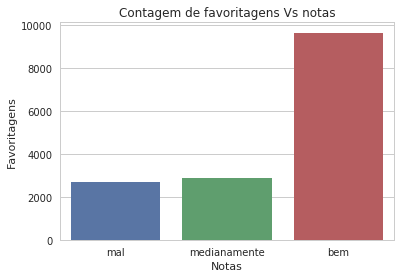

In [46]:
sns.set(style="whitegrid")

ax = sns.barplot(x="rating_numerator", y="favorite_count", 
                 data=dfapresenta, ci=None)
ax.set_title("Contagem de favoritagens Vs notas")
ax.set_xlabel('Notas')
ax.set_ylabel('Favoritagens')
plt.show()

---

#### Uma observação final sobre o projeto

Sofri um bocado para colocar essas coisas no lugar. Levei mais tempo do que esperava e pensei que não fosse dar conta do projeto.

Depois percebi que estava emperrando em alguns defeitos conceituais da minha parte no **Pandas**. Correu tudo bem e aprendi muitas coisas. A ferramenta **SQL** é ótima e muito eficiente para algumas tarefas (consultas e reparos de dados em lote), mas não é muito eficiente em tarefas especializadas (como aquele meu filtro de nome do cão em um texto). Então valeu à pena brigar com o **Pandas**!

O que será daqui para frente? Vou implantar a ferramenta **Pandas** + **Jupyter Notebook** para diversas coisas que fazemos aqui na ANA (Agência Nacional de Águas)

Nota final:

- inicialmente achei super estranho, um banco chamado **We Rate Dogs**?

- nunca havia usado Twitter. Abri minha conta e adicionei o grupo

- realmente foi um projeto muito, mas muito **fofinho**! Posso dizer que no final, simplesmente **amei**!

*Mais uma nota: por favor evitem nos próximos projetos usarem temas pesados como o **Cancer Data**. Tive muitos familiares mortos deste mal e é um pouco traumatizante. Acaba não sendo divertido fazer exercícios do tipo: qual a probabilidade de você ter **câncer**, dado que fez um teste e deu **positivo**...*